In [27]:
# Import libraries
import math
import networkx as nx
import numpy as np
import plotly.graph_objects as go

In [37]:
# Generate crossing path
def x_align(length, offset):
    x_vals = np.linspace(0, 10, length)
    y_vals = np.repeat(offset, length)

    reading = np.vstack((x_vals, y_vals))
    reading = reading.T

    return reading

def generate_path(length, flip=False):
    val = 5000
    poly_coefs = [4, 3, 2, 1]

    x_vals = np.linspace(-40, 40, length)
    y_vals = np.polyval(poly_coefs, x_vals) / val
    if flip:
        y_vals = np.polyval(poly_coefs, x_vals) / val - 10
        x_vals = np.linspace(40, -40, length)

    reading = np.vstack((x_vals + 40, y_vals + 60))
    reading = reading.T

    return reading


In [47]:
# Plot tracks path
def plot_paths(target_0, target_1):
    delta = 20
    # Separate each axis data
    x_coord_0 = [x[0] for x in target_0]
    y_coord_0 = [x[1] for x in target_0]

    x_coord_1 = [x[0] for x in target_1]
    y_coord_1 = [x[1] for x in target_1]
    
    # Initialize Plotly Fig object
    fig = go.Figure()
    # Add scatter plot for the sensor data
    fig.add_trace(go.Scatter(x=x_coord_0, y=y_coord_0, mode="markers", name='Target 1 detections'))
    fig.add_trace(go.Scatter(x=x_coord_0, y=y_coord_0, mode="lines",  name='Target 1 track'))
    fig.add_trace(go.Scatter(x=x_coord_1, y=y_coord_1, mode="markers",  name='Target 2 detections'))
    fig.add_trace(go.Scatter(x=x_coord_1, y=y_coord_1, mode="lines",  name='Target 2 track'))
    
    fig.update_layout(
        autosize=False,
        width=100,
        height=100,
        title="Actual Targets Plot",
        xaxis_title="x axis",
        yaxis_title="y axis",
        xaxis_range=[min(target_0[:, 0]) - 2, max(target_0[:, 0]) + 2],
        yaxis_range=[min(target_0[:, 1]) - delta, max(target_1[:, 1]) + delta],
        legend_title="Detections and Tracks",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

    fig.show()

In [53]:

if __name__ == "__main__":
    duration = 12
    dims = 2
    num_targets = 2

    # As targets are known, we initialize two local hypothesis
    target_0 = generate_path(duration,)
    target_1 = generate_path(duration, True)
    
    plot_paths(target_0, target_1)


4 (array([10.,  2.]), array([10.,  5.]))


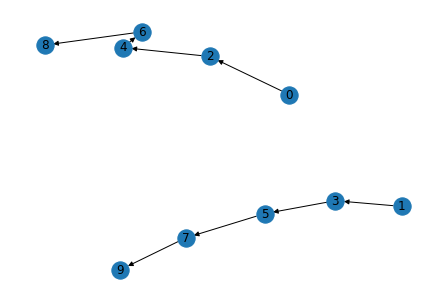

In [5]:
    
    # Initialize graph object
    G = nx.DiGraph()
    
    # Now, iterate through the detections and update local hypothesis based on shortest distance
    for time_, j in enumerate(zip(target_0, target_1)):
        if time_ == 0:
            G.add_node(0, weight=1, loc=j[0].tolist())
            G.add_node(1, weight=1, loc=j[1].tolist())
            # G.add_nodes_from(range(num_targets))

        else:
            # First detected target
            G.add_node(len(G.nodes), loc=j[0])
            diff_0 = math.dist(j[0], G.nodes[len(G.nodes) - 3]['loc'])
            diff_1 = math.dist(j[0], G.nodes[len(G.nodes) - 2]['loc'])

            if diff_0 < diff_1:
                G.add_edge(len(G.nodes) - 3, len(G.nodes) - 1, weight=1,)
            else:
                G.add_edge(len(G.nodes) - 2, len(G.nodes) - 1, weight=1,)

            # Second detected target
            G.add_node(len(G.nodes), loc=j[1])
            diff_0 = math.dist(j[1], G.nodes[len(G.nodes) - 3]['loc'])
            diff_1 = math.dist(j[1], G.nodes[len(G.nodes) - 2]['loc'])

            if diff_0 < diff_1:
                G.add_edge(len(G.nodes) - 3, len(G.nodes) - 1, weight=1,)
            else:
                G.add_edge(len(G.nodes) - 2, len(G.nodes) - 1, weight=1,)

    nx.draw(G, with_labels = True)
    print(time_, j)
# print(target_0)

In [6]:
# Find all paths caterring the negative weights
paths = nx.johnson(G, weight='weight')
# G.edges(data=True)

In [ ]:
# All paths
paths

# Generic function to calculate all paths between two nodes
for path in nx.all_simple_paths(G, source=1, target=5):
        print(path)

In [26]:
all_paths = []
for key, val in paths.items():
    for ke, va in val.items():
        all_paths.append(va)
lengths = [len(path) for path in all_paths]
sorted_paths = [path for _, path in sorted(zip(lengths, all_paths), reverse=True)]
longest_2_paths = sorted_paths[:2]

# Print the 2 longest paths
for i, path in enumerate(longest_2_paths):
    print(f"Longest path {i+1}: {path}")

Longest path 1: [1, 3, 5, 7, 9]
Longest path 2: [0, 2, 4, 6, 8]


In [20]:
for path in nx.all_simple_paths(G, source=1, target=5):
        print(path)

1

In [24]:
paths

{0: {0: [0], 2: [0, 2], 4: [0, 2, 4], 6: [0, 2, 4, 6], 8: [0, 2, 4, 6, 8]},
 1: {1: [1], 3: [1, 3], 5: [1, 3, 5], 7: [1, 3, 5, 7], 9: [1, 3, 5, 7, 9]},
 2: {2: [2], 4: [2, 4], 6: [2, 4, 6], 8: [2, 4, 6, 8]},
 3: {3: [3], 5: [3, 5], 7: [3, 5, 7], 9: [3, 5, 7, 9]},
 4: {4: [4], 6: [4, 6], 8: [4, 6, 8]},
 5: {5: [5], 7: [5, 7], 9: [5, 7, 9]},
 6: {6: [6], 8: [6, 8]},
 7: {7: [7], 9: [7, 9]},
 8: {8: [8]},
 9: {9: [9]}}